# Processamento de Linguagem Natural
## Classificação de Texos para Agilizar Processos
###### Leandro de Alencar
----
<a href="https://ibb.co/ctHGQBd"><img src="https://i.ibb.co/RPmxcFW/Word-Cloud.png" alt="Word-Cloud" border="0"></a>

## Table of contents
* [Introdução](#introducao)
* [Descrição](#desc)
* [Situação Problema](#prob)
* [O Modelo: Dados](#data)
* [O Modelo: Código](#code)
* [Conclusão](#conclusao)


# 1. Introdução <a name="introducao"></a>

A classificação de texto é a tarefa de atribuir um conjunto de categorias predefinidas ao texto livre. Por exemplo, novos artigos podem ser organizados por tópicos, tickets de suporte podem ser organizados por urgência, conversas de bate-papo podem ser organizadas por idioma, menções de marca podem ser organizadas por sentimentos e assim por diante.

Algumas das razões pelas quais as empresas estão aproveitando a classificação de texto com o <i>machine learning</i> são as seguintes:

- **Escalabilidade**: analisar e organizar manualmente o texto leva tempo. É um processo lento, em que um humano precisa ler cada texto e decidir como estruturá-lo. O *machine learning* muda isso e permite analisar facilmente milhões de textos por uma fração do custo. 

- **Análise em tempo real**: existem situações críticas que as empresas precisam identificar o mais rápido possível e tomar medidas imediatas, como, por exemplo, crises de relações públicas nas mídias sociais. Classificadores de texto com *machine learning* podem fazer identificações precisas em tempo real, permitindo que as empresas identifiquem informações críticas e tomem medidas imediatamente.

- **Critérios consistentes**: os anotadores humanos cometem erros ao classificar dados de texto devido a distrações, fadiga e tédio. Outros erros são gerados devido a critérios inconsistentes. Por outro lado, o *machine learning* aplica as mesmas lentes e critérios a todos os registros, permitindo que os humanos reduzam erros com modelos de classificação de texto centralizados.


# 2. Descrição do Projeto <a name="desc"></a>

Este projeto foi proposto a uma instituição do ramo financeiro, cuja identidade será preservada, e consiste na aplicação de *machine learning* para classificação de e-mails recebidos de seus associados (clientes externos) por meio dos canais de atendimento com o objetivo de otimizar o tempo gasto neste processo, realizado manualmente por agentes humanos.

Para auxiliar no entendimento dos texto, identificaremos a instituição em questão apenas como "Empresa A".


# 3. Situação Problema <a name="prob"></a>

A Empresa A disponibiliza duas formas de atendimento aos seus clientes, que no contexto de sua atuação são chamados de associados, sendo elas o meio telefônico e o digital. No meio digital, as mensagens podem ser enviadas por e-mail, área restrita do site ou pelo "fale conosco" disponível na área publica site, e, após recebidas, necessitam ser classificadas de acordo com seu teor para, então, serem tratadas ou direcionadas ao setor competente. 

Aqui é onde ocorrem os problemas: e-mails não possuem uma conjunto de classificações predeterminadas, e, além disso, a classificação genérica que é realizada nas outras duas formas de envio não satifstaz os requisitos para os trâmites internos das ocorrências.

O processo manual é realizado em 7 etapas:

**1** - Abertura e leitura da mensagem;

2 - Validação de documento anexado, quando houver;

**3** - Abertura de ocorrência no sistema interno de processos;

**4** - Copiar todas as informações do e-mail para a ocorrência citada anteriormente;

**5** - Baixar o anexo do e-mail para incluí-lo na ocorrência;

**6** - Realizar a classificação da ocorrência;

7 - Encaminhar a ocorrência para o setor competente;

Com a implementação da classificação de textos via PLN, a ideia é que o modelo realize os passos 1, 3, 4, 5 e 6, restando para o agente humano apenas 2 etapas:

1 - Validar visualmente o documento anexado, quando houver;

2 - Encaminhar a ocorrência ao setor competente.

# 4. O Modelo Classificador <a name="data"></a>
## 4.1 Dados

Ao utilizar exemplos de dados pré-classificados como dados de treino, o algoritmo de machine learning pode aprender diferentes associações entre as partes do texto que levam a um resultado esperado específico, sendo capaz de transformar esta rotina manual e morosa em algo automatizado e rápido. 

Os conjunto de dados utilizado possui 5.436 registros, com 19 classificações possíveis, distribuídas de 26 a 587 registros por categoria. Este conjunto de dados foi selecionado a partir de mensagens de associados que foram enviadas entre 2016 e 2019 e existem diversos casos em que textos semelhantes possuem classificações diferentes, ou seja, é possível que isso tenha ocorrido devido à variabilidade dos agentes humanos classificadores, que não utilizam critérios consistentes para classificação, bem como existe a possibilidade de preenchimento equivocado intencional.  

Apesar disso, o modelo aqui apresentado, ainda em estágio de desenvolvimento, possui alta acurácia: estima-se que a classificação será realizada corretamente para 80,1% dos novos casos de entrada. Dessa forma, poderá haver casos em que mensagens sejam classificadas erroneamente, necessitando que um agente humano faça a sua reclassificação. Todavia, o modelo permite a retroalimentação, aprendendo com as classificações corrigidas por humanos para melhora dos resultados preditos.

## 4.2 Código <a name="code"></a>
### Bibliotecas e dependências do Python:
* Pandas – Manipulação e análise de dados 
* NumPy – Manipulação de dados  
* Seaborn - Visualização gráfica    
* Matplotlib – Visualização gráfica     
* NLTK – Processamento de Linguagem Natural
* spaCy – Processamento de Linguagem Natural
* re – Expressões Regulares
* Scikit-learn - Aprendizado de máquina

In [215]:
import pandas as pd
import numpy as np
import nltk
import pandas as pd
import re
import spacy
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Definição de Classe para pré-processamento do Corpus

In [199]:
class DataPrep:
            
    def __init__(self):
        print('DataPrep ready.')
        
    def remove_stopwords(self, texto):
        stop_words = nltk.corpus.stopwords.words('portuguese')
             
        remover = [**lista de palavras escolhidas após análise exploratória 
                   (Apagado para preservar a identidade da instituição)**]
        
        stop_words.extend(remover)
        
        """ Função para remover stopwords e outras palavras predefinidas"""
        texto_limpo = " ".join([i for i in texto if i not in set(stop_words)])
        return texto_limpo
    
    def clean_text(self, texto):
        df_corpus = []
        for i in range(len(texto)):
            df_c = re.sub('[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', texto[i]).lower().split()
            df_corpus.append(df_c)
        df_corpus= pd.Series(df_corpus).apply(lambda x: ' '.join([w for w in x if len(w)>2]))
        corpus = [self.remove_stopwords(r.split()) for r in df_corpus]
        return corpus

    def lemmatization(self, texto):
        nlp = spacy.load('pt', disable=['parser', 'ner'])
        output = []
        for sent in texto:
            doc = nlp(" ".join(sent)) 
            output.append([token.lemma_ for token in doc])
        return output

    def lemmatize(self, texto):
        token = self.lemmatization(pd.Series(self.clean_text(texto)).apply(lambda x: x.split()))
        token_lemma = []
        for i in range(len(token)):
            token_lemma.append(' '.join(token[i]))
        return token_lemma
    
    def list_freq(self, texto, terms=30):
        all_words = ' '.join([text for text in texto])
        all_words = all_words.split()
        fdist = FreqDist(all_words)
        words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
        d = words_df.nlargest(columns="count", n=terms) 
        return d
        print(d[:terms])
        
    def plot_freq(self, texto, terms=30):
        plt.style.use('fivethirtyeight')
        all_words = ' '.join([text for text in texto])
        all_words = all_words.split()
        fdist = FreqDist(all_words)
        words_df = pd.DataFrame({'Palavra':list(fdist.keys()), 'Frequência':list(fdist.values())})
        d = words_df.nlargest(columns="Frequência", n = terms) 
        
        plt.figure(figsize=(20,5))
        ax = sns.barplot(data=d, x= "Palavra", y = "Frequência", palette=sns.light_palette("navy", n_colors=terms, reverse=True))
        ax.set_xticklabels(labels=d['Palavra'], rotation = 45)
        ax.set(ylabel = 'Frequência')
        ax.set(xlabel = '')
        plt.show()
        
dp = DataPrep()

DataPrep ready.


### Importação dos dados

In [46]:
df = pd.read_excel(r'.\dataset1.xlsx')
df['texto'] = df['texto'].astype('U')

print('Formato do Data Frame: ', df.shape)
print('\nDistribuição das Etiquetas:\n', df['class_final'].value_counts().reset_index().rename(columns={'index':'Classificação','class_final':'Frequência'}).set_index('Classificação'))

Formato do Data Frame:  (5436, 4)

Distribuição das Etiquetas:
                            Frequência
Classificação                        
Créditos                          587
Atualização                       542
Investimentos                     527
Cobrança                          522
Extrato                           521
Sobras                            512
Capital                           465
Exclusão                          426
Senha                             402
Admissão                          187
Convênios                         183
Relacionamento                    171
Brindes                           148
Atendimento                        56
Livelo                             46
Relação Contratual                 43
Comunicação e Publicidade          42
Fiança Locatícia                   30
Canal de Atendimento               26


### Pré-processamento e visualização das palavras por frequência

In [114]:
corpus = dp.lemmatize(df['texto'])

DataPrep ready.


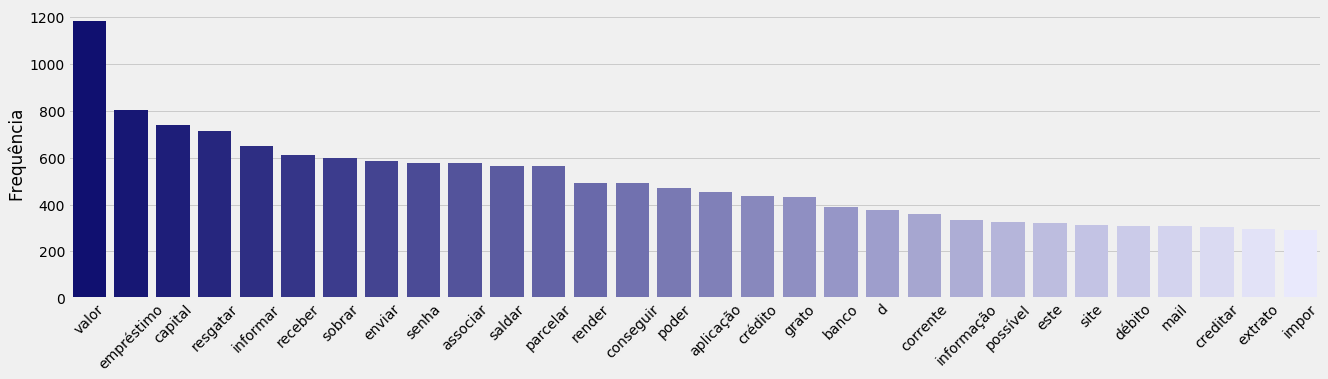

In [200]:
dp.plot_freq(corpus)

### Parametrização do Modelo de Classificação

O modelo de classificação utiliza o método de Bag of Words (Saco de Palavras) para estruturação do Corpus. Para exemplificar, este método funciona como se cada coluna correspondesse a uma palavra e cada linha a um registro do Corpus. Dessa forma, caso a palavra conste no registro, ou seja em suas frases, será atribuído valor 1, caso contrário o valor será 0.

No caso deste modelo, cada coluna pode corresponder a um "Unigram" ou "Bigram", ou seja, uma palavra ou a combinação de duas palavras.

In [97]:
vectorizer = CountVectorizer(min_df=2, strip_accents='unicode',
                             ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

print('Exemplo do Bag of Words, seleção de 20 colunas dentre as 5000:\n')
print(X[0,:].tolist()[325:345], y[0])
print(X[2500,:].tolist()[325:345], y[2500])

Exemplo do Bag of Words, seleção de 20 colunas dentre as 5000:

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Admissão
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] Créditos


### Selecão dos dados de Treino e Teste
<br>
<div style="text-align: justify">
O algoritmo escolhido para ajuste do modelo é o Multinomial Naive Bayes, que é baseado no Teorema de Bayes.
<br>

In [98]:
# =============================================================================
# # Splitting the dataset into the Training set and Test set
# =============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# =============================================================================
# # Fitting Naive Bayes to the Training set
# =============================================================================
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
# =============================================================================
# # Predicting the Test set results
# =============================================================================
y_pred = classifier.predict(X_test)

# =============================================================================
# # Model Evaluation
# =============================================================================
print('Acurácia de: ', "{0:.1f}".format(accuracy_score(y_test, y_pred)*100),'%')

Acurácia de:  80.1 %


### Verificação do resultado

Devido ao conjunto de dados possuir mensagens classificadas erroneamente, foram elaboradas 11 mensagens para verificar se o desempenho do modelo é satisfatório.

In [103]:
# =============================================================================
# Teste de entrada
# =============================================================================
testes = ["Gostaria de saber qual a taxa de juros do meu empréstimo.", 
          "Qual é a taxa de rendimento para aplicação?", 
          "Segue cópia do RG para atualização cadastral",
          "Não quero mais ser associado, por favor solicito a exclusão.",
          "Prezados, estou passando por dificuldades financeiras e preciso regularizar minha situação.",
          "Por favor, preciso do envio do extrato para imposto de renda.",
          "Boa tarde, quais são os procedimentos para usufruir dos convênios educacionais?",
          "Esta tarde liguei para vocês e não gostei do atendimento de fulana, apesar de sempre ser muito bem atendida quando entro em contato, desta vez a atendente foi extremamente mal educada.",
          "Por que meus empréstimos possuem segura prestamista? Não lembro de ter solicitado, exigo o cancelamento imediato!",
          "Por favor, desejo saber qual meu limite de crédito e o que preciso fazer para atualizar meu cadastro.",
          "Tenho um empréstimo em aberto, quero saber se tem como parcelar.",
          "Boa noite. Gostaria de saber como efetuar meu cadastro para acesso via internet, já sou sócio da cooperforte",
          "Olá como faço para liberar algum valor em minha conta?"]

corpus2 = dp.lemmatize(testes)
testes_transform = vectorizer.transform(corpus2)
for i in range(len(testes)):
    print("{} {:-<16}: {}".format([i+1], classifier.predict(testes_transform)[i], testes[i]))

[1] Créditos--------: Gostaria de saber qual a taxa de juros do meu empréstimo.
[2] Investimentos---: Qual é a taxa de rendimento para aplicação?
[3] Atualização-----: Segue cópia do RG para atualização cadastral
[4] Exclusão--------: Não quero mais ser associado, por favor solicito a exclusão.
[5] Cobrança--------: Prezados, estou passando por dificuldades financeiras e preciso regularizar minha situação.
[6] Extrato---------: Por favor, preciso do envio do extrato para imposto de renda.
[7] Convênios-------: Boa tarde, quais são os procedimentos para usufruir dos convênios educacionais?
[8] Atendimento-----: Esta tarde liguei para vocês e não gostei do atendimento de fulana, apesar de sempre ser muito bem atendida quando entro em contato, desta vez a atendente foi extremamente mal educada.
[9] Relação Contratual: Por que meus empréstimos possuem segura prestamista? Não lembro de ter solicitado, exigo o cancelamento imediato!
[10] Atualização-----: Por favor, desejo saber qual meu lim

# 5. Conclusão <a name="conclusao"></a>

O fato de o conjunto de dados possuir registros classificados erroneamente dificulta a avaliação da acurácia do modelo, pois há casos em que o modelo classifica uma mensagem que fala sobre empréstimos como "Créditos", mas estava previamente etiquetado como "Cadastro", abaixando a acurácia; ou então a classifica também erroneamente como cadastro, aumentando o indicador.

Dessa forma, em primeiro lugar é necessário que seja realizado um trabalho sobre este conjunto de dados com regras de classificação bem definidas a fim de excluir ou minimizar a ocorrências de registros etiquetados de forma errada.

Contudo, o desempenho geral do modelo é satisfatório e poderia já ser utilizado de modo que as classificações erradas fossem corrigidas pelos atendentes humanos, para, assim, serem reutilizadas no ajuste do modelo de forma a incrementar sua acurária.

<h3><i>Extra: Código da Word Cloud</i></h3>

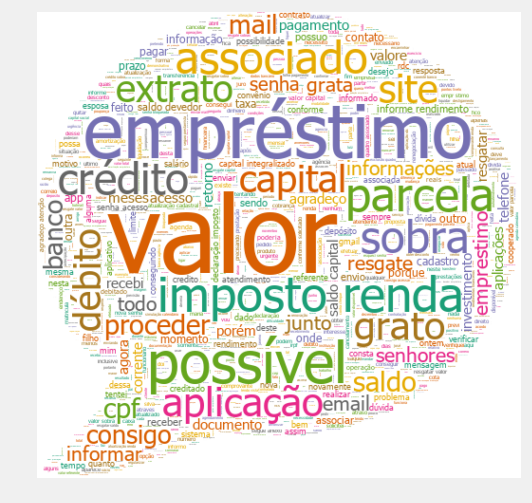

In [218]:
from PIL import Image
from wordcloud import WordCloud

corpus = dp.clean_text(df['texto'])
word = ' '.join(corpus)

mask = np.array(Image.open('mask.png'))

plot_wc = WordCloud(background_color='white', max_words=2000, mask=mask,
                     min_font_size=1, colormap='Dark2',random_state=12345,
                     font_path=r'C:\Windows\Fonts\Tahoma.ttf')


plot_wc.generate(word)

fig = plt.figure(figsize=(9,8))

plt.imshow(plot_wc, interpolation='bilinear')
plt.axis('off')
plt.show()